**데이터 로드 및 전처리**

* CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리
* 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용
* 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용
* 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [3]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=2023)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 26s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.





In [4]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.





C:\Users\sunw0506\AppData\Local\Temp\ipykernel_740\2355943253.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


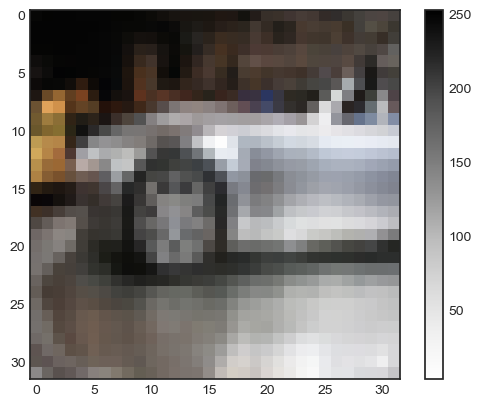

In [5]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [6]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.





In [7]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
x_val_reshaped = x_val.reshape(x_val.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

**모델 구성 및 컴파일**
* BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.





In [16]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import layers, models

# 모델 구성
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(3072,)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              3146752   
                                                                 
 batch_normalization_3 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_4 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 512)              

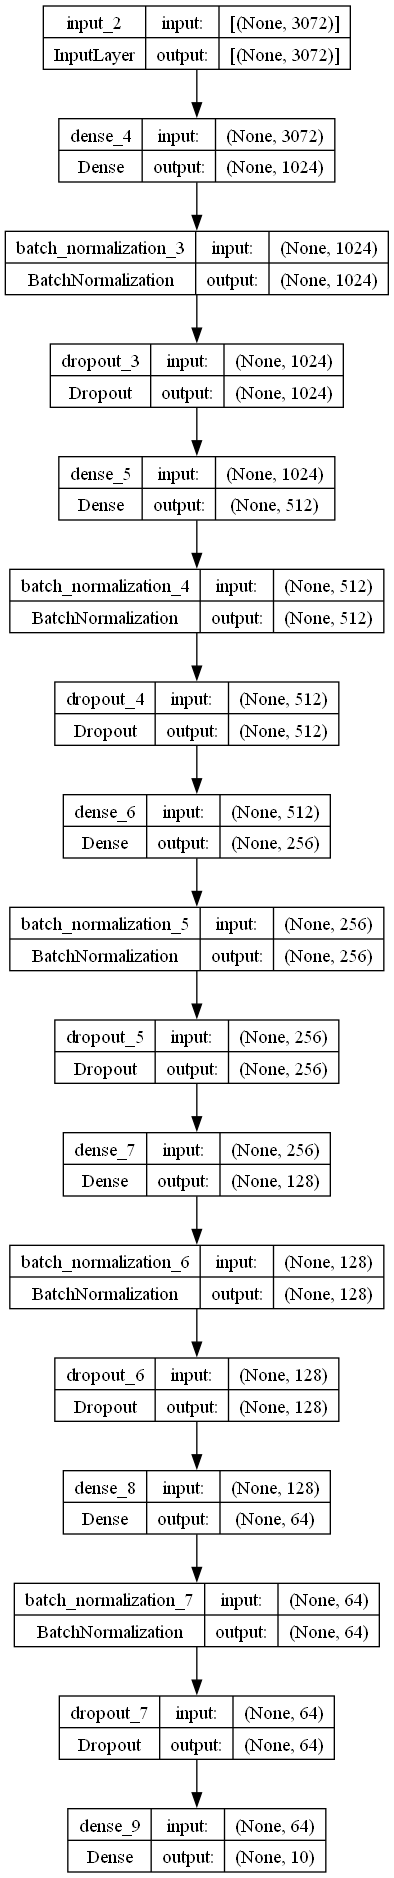

In [17]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

**모델 학습**
* ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.





In [18]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train_reshaped, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_val_reshaped, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/100
1250/1250 [==============================] - 40s 31ms/step - loss: 2.2789 - accuracy: 0.2068 - val_loss: 1.8862 - val_accuracy: 0.3294
Epoch 2/100
1250/1250 [==============================] - 40s 32ms/step - loss: 1.9462 - accuracy: 0.2879 - val_loss: 1.8635 - val_accuracy: 0.3348
Epoch 3/100
1250/1250 [==============================] - 40s 32ms/step - loss: 1.9276 - accuracy: 0.2991 - val_loss: 1.9720 - val_accuracy: 0.2969
Epoch 4/100
1250/1250 [==============================] - 38s 31ms/step - loss: 1.9102 - accuracy: 0.3037 - val_loss: 1.9442 - val_accuracy: 0.3089
Epoch 5/100
1250/1250 [==============================] - 38s 31ms/step - loss: 1.9056 - accuracy: 0.3077 - val_loss: 1.8367 - val_accuracy: 0.3635
Epoch 6/100
1250/1250 [==============================] - 40s 32ms/step - loss: 1.9014 - accuracy: 0.3109 - val_loss: 1.7963 - val_accuracy: 0.3671
Epoch 7/100
1250/1250 [==============================] - 41s 33ms/step - loss: 1.8843 - accuracy: 0.3194 - val_loss: 1

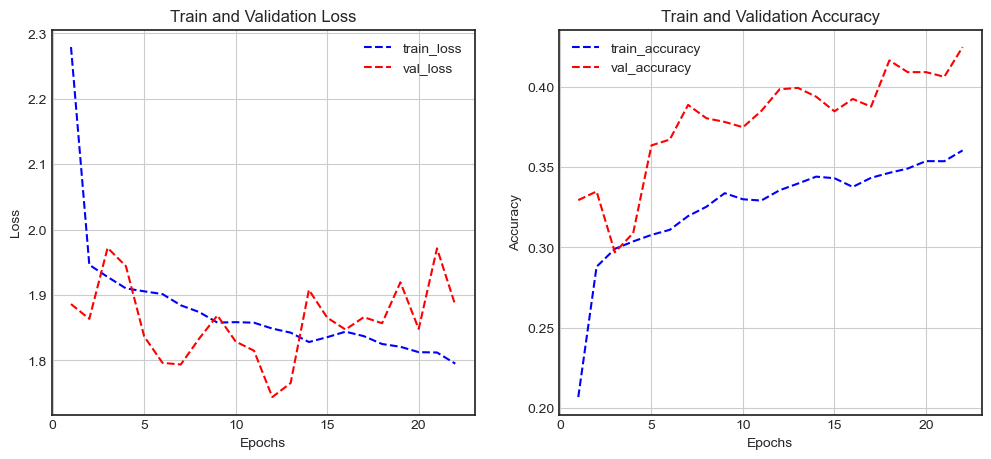

In [20]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1) # add_subplot 메서드를 사용하여 fig에 새로운 서브플롯(subplot)을 추가합니다. 이 서브플롯은 1x2 그리드의 첫 번째 위치에 배치됩니다. 결과적으로, 이 그림에는 두 개의 서브플롯이 옆으로 나란히 배치됩니다.
ax1.plot(epochs, loss, 'b--', label='train_loss') # plot 메서드를 사용하여 epochs를 x축으로, loss와 val_loss를 y축으로 하는 두 개의 선 그래프를 그립니다.
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid() # grid 메서드를 사용하여 그리드 라인을 추가합니다. 이는 그래프를 더 쉽게 읽을 수 있게 도와줍니다.
ax1.legend() # legend 메서드를 사용하여 범례를 추가, 범례는 plot 메서드에서 설정한 레이블을 사용

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend() 

plt.show()

**모델 평가 및 예측**


In [21]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test_reshaped, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.7440 - accuracy: 0.4002


[1.7439788579940796, 0.4002000093460083]